# Project notebook **<span style="COLOR:RED">(complete this cell)</span>**


### Student 1 (first half presentation)
Name : Mathilde DUVERGER
<br>Group : advanced
### Student 2 (second half presentation)
Name : Clément PONSONNET 
<br>Group : advanced
### Data name : San Francisco Crime Data
### Data URL : https://www.kaggle.com/c/sf-crime/data
### Short summary of the project and datasource :
This project focuses on the different crimes (categories) that happened in different districts of San Francisco between 2003 and 2015. Firstly, we produced a few visualisations such as the most common crimes, distribution accross districts/days/hours, the heattable of the percentage of each crime per district and the evolution of resolution. As we noticed a normal like distribution for crimes given hours we fitted a Gaussian Prediction Method. Last but not least, we try responding to the challenge of predicting the category of the crime given informations such as the place and time.

# General instructions (this cell might be deleted for submission)
** <span style="color:red"> Write all the project in this file : code and explanations and upload it before January 7th at 23:55 </span> ** : 

<span style="color:red">Remember : Code cells must be smaller than 30 lines </span>

Every thing must be in the notebook :

* Explanation of what you want to do with data should be present in the Notebook
* Download data in the notebook (check the URL availability) and give the source of data (both URL and textual description)
* Give as much as possible characteristics of data (size, type, fields, ...)
* Provide visualisation of the data that you think useful
* Check for the consistence of the dataset (error, missing data,...) and correct and/or delete errors
* **Ask yourself a question that request you to perform an estimation** (for example, you can choose a data depending on time, and try to predict the latest 10% of data knowing the rest of data). **This will typically be solved through the proposal of a model and fitting the parameters of the model to (part of) the data.**

If you end up writing long chunks of code, make sure you split it in logical «smaller code cells» and explain the logic. The Juptyer Notebook will be **both the memoire** you will submit for evaluation **and the visual support** for your oral presentation of your project, keep this in mind while writing it.

### Aims : 
* Distribution of crimes accross districts/days/hours
* Top 5 crimes and evolution through years
* Heattable of percentage of crimes per district
* Evolution of crime resolution 
* Predict crimes per hour for the next day
* Predict the category of the crime given place,time...

### Imports :
We import the different packages we need in this project.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar
import datetime

### Download : 
There is no actual data download link so we had to manually download the train.csv file and then open it in Python.

In [2]:
# download the data
snf = pd.read_csv('train.csv')

In [3]:
snf[:5]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


We delete rows where there is missing information, create year, month, day and hour columns and delete all data from 2015 as we do not have the data for the whole of 2015 and it affects visualisation of evolution of crimes through years. 



In [4]:
# delete rows with NA
snf = snf.dropna()

snf['Dates'] = pd.to_datetime(snf['Dates'])

# create new columns
snf['Year'] = snf['Dates'].dt.year
snf['Month'] = snf['Dates'].dt.month
snf['Day'] = snf['Dates'].dt.day
snf['Hour'] = snf['Dates'].dt.hour

snf['Date_without_time'] = snf['Dates'].dt.date

snf.reset_index(inplace = True)

# delete the data from 2015
snf = snf[snf.Year != 2015]

### Data charaterisctics :  Here, give as much as possible characteristics of data
We give the columns names and types and look at the index of our dataset. Noticing a OTHER OFFENSES category in the data, we decided to take a closer look at it and given it includes many different crimes we have decided to delete it from the dataset.

In [5]:
print('Columns :',snf.columns)
print('Indexes :',snf.index)

print('Column types :',snf.dtypes)

Columns : Index(['index', 'Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Year', 'Month', 'Day', 'Hour',
       'Date_without_time'],
      dtype='object')
Indexes : Int64Index([ 27584,  27585,  27586,  27587,  27588,  27589,  27590,  27591,
             27592,  27593,
            ...
            878039, 878040, 878041, 878042, 878043, 878044, 878045, 878046,
            878047, 878048],
           dtype='int64', length=850465)
Column types : index                         int64
Dates                datetime64[ns]
Category                     object
Descript                     object
DayOfWeek                    object
PdDistrict                   object
Resolution                   object
Address                      object
X                           float64
Y                           float64
Year                          int64
Month                         int64
Day                           int64
Hour                          

In [6]:
# print the different categories
print('Categories :',snf.Category.unique())

snf.set_index('Category', inplace = True)
# print the description of OTHER OFFENSES crimes 
print('Other offenses :',snf.loc['OTHER OFFENSES'].Descript.unique())

# delete OTHER OFFENSES crimes
snf.drop('OTHER OFFENSES', inplace=True)
snf.reset_index(inplace = True)

Categories : ['LARCENY/THEFT' 'VEHICLE THEFT' 'ASSAULT' 'WARRANTS' 'DRUG/NARCOTIC'
 'OTHER OFFENSES' 'SUSPICIOUS OCC' 'NON-CRIMINAL' 'ROBBERY' 'BURGLARY'
 'VANDALISM' 'WEAPON LAWS' 'SECONDARY CODES' 'FRAUD' 'MISSING PERSON'
 'STOLEN PROPERTY' 'TRESPASS' 'DISORDERLY CONDUCT' 'LOITERING'
 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'EMBEZZLEMENT'
 'DRIVING UNDER THE INFLUENCE' 'FAMILY OFFENSES' 'RUNAWAY' 'LIQUOR LAWS'
 'PROSTITUTION' 'KIDNAPPING' 'SEX OFFENSES FORCIBLE' 'ARSON' 'BAD CHECKS'
 'SUICIDE' 'BRIBERY' 'EXTORTION' 'GAMBLING' 'SEX OFFENSES NON FORCIBLE'
 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']
Other offenses : ['RESISTING ARREST' 'TRAFFIC VIOLATION' 'LOST/STOLEN LICENSE PLATE'
 'DRIVERS LICENSE, SUSPENDED OR REVOKED'
 'EVADING A POLICE VEHICLE OR BICYCLE' 'MISCELLANEOUS INVESTIGATION'
 'PROBATION VIOLATION' 'FALSE PERSONATION' 'HARASSING PHONE CALLS'
 'PAROLE VIOLATION' 'TRAFFIC VIOLATION ARREST'
 'POSSESSION OF BURGLARY TOOLS W/PRIORS' 'VIOLATION OF MUNICIPAL CODE'
 'VI

### Data visualisation and representation
We have produced the following visualisations
* number of crimes per category
* number of crimes per neighborhood
* number of crimes per day
* number of crimes per hour

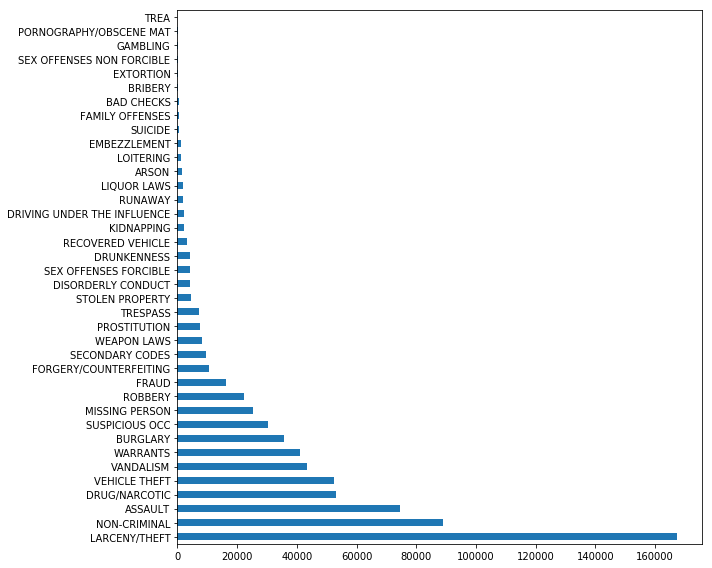

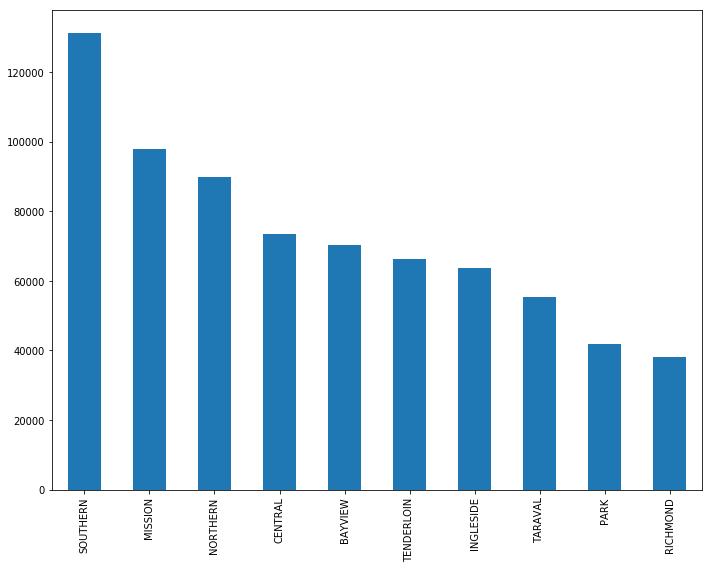

In [7]:
# plot the number of crimes per category
cat = snf.Category.value_counts()
f = plt.figure(figsize=(10,8))
cat.plot(kind = 'barh')
f.tight_layout()
plt.show()

# extract the top five crimes
topcrime = cat.sort_values(ascending = False)[:5]

# plot the number of crimes per police district
cat = snf.PdDistrict.value_counts()
f = plt.figure(figsize=(10,8))
cat.plot(kind = 'bar')
f.tight_layout()
plt.show()

The top five crimes observed are LARCENY/THEFT, NON-CRIMINAL, ASSAULT, DRUG/NARCOTIC and VEHICLE THEFT crimes with LARCENY/THEFT far ahead in terms of number of crimes. From the plot of number of crimes per police district, we clearly notice some districts are more dangerous such as SOUTHERN whereas some districts are calmer ares like RICHMOND.

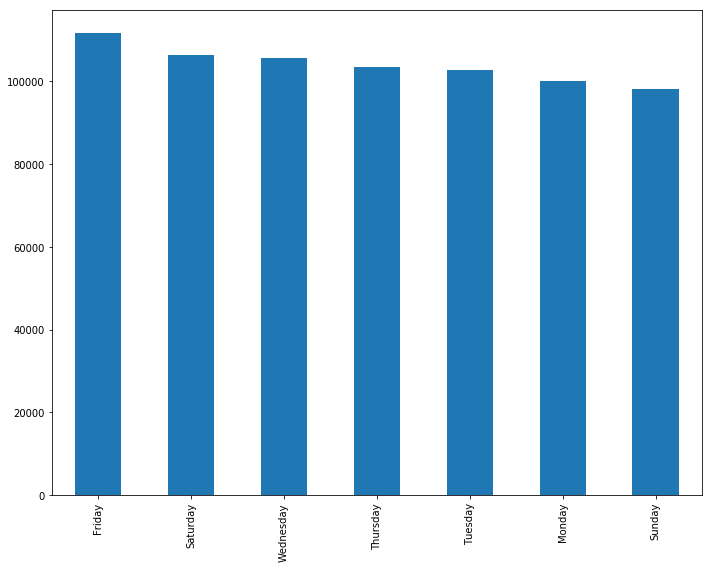

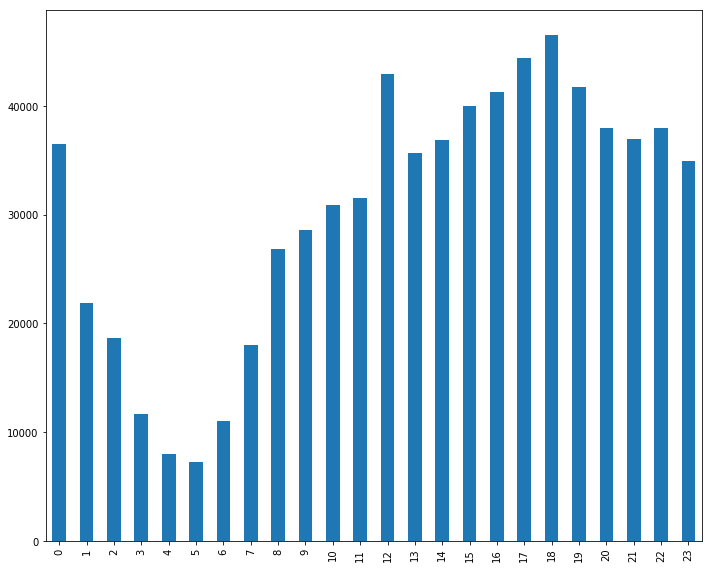

In [8]:
# plot number of crimes per day 
cat = snf.DayOfWeek.value_counts()
f = plt.figure(figsize=(10,8))
cat.plot(kind = 'bar')
f.tight_layout()
plt.show()

# plot number of crimes per hour
h = snf.Hour.value_counts().sort_index()
f = plt.figure(figsize=(10,8))
h.plot(kind = 'bar')
f.tight_layout()
plt.show()

The number of crimes per day are approximately uniformly distributed with a bit more crimes observec on Fridays. The plot of number of crimes per hour shows a peak at 19H and a lower peak at 12H. There are little crimes in at dawn. 

* heatable of crimes categories by neighborhood

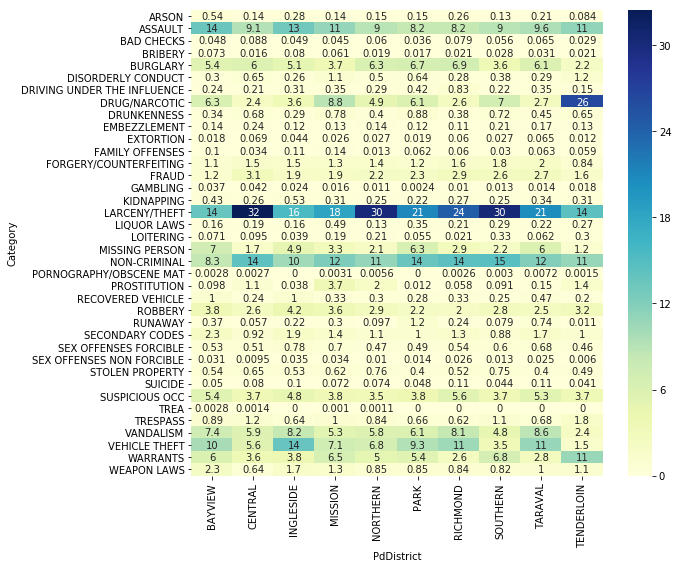

In [9]:
# group crimes by category and district
dis_crime = snf.groupby(['Category','PdDistrict']).size().unstack()

# fill NA values with 0 so that we can still calculate the percentage
dis_crime.fillna(value=0,inplace=True)

# calculate the percentage of each crime for each district
pdu = snf.PdDistrict.unique()
for dis in pdu:
    dis_crime[dis] = dis_crime[dis]/sum(dis_crime[dis])*100
    
# plot heatable of percentage of crime per district
f = plt.figure(figsize=(10,8))
sns.heatmap(dis_crime, annot = True,cmap="YlGnBu")
f.tight_layout()
plt.show()

This is an interesting heatable as it allows us to see at the same time the more regular crimes and the districts that have a lot of occurrences of a particular crime. LARCENY/THEFT crimes is the number one crime in most of the districts, NON-CRIMINAL coming second, ASSAULT crimes coming third and then VEHICLE THEFT. The main exception is the DRUG/NARCOTIC crimes that are not very regular in districts except in TENDERLOIN that clearly faces a problem with DRUG/NARCOTIC crimes.

* evolution of top 5 crimes through years

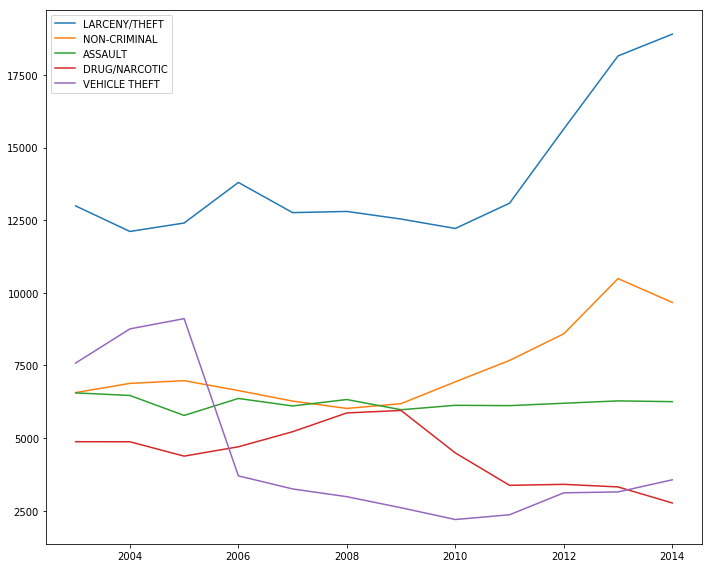

In [10]:
# extract data for top five crimes
t = topcrime.index
snf.set_index('Category', inplace = True)
snf_top = snf.loc[t]
snf.reset_index(inplace = True)
snf_top.reset_index(inplace = True)

# group crimes by category and year
snf_top.set_index('Category', inplace = True)
evol = snf_top.groupby(['Category','Year']).size().unstack()

# plot evolution of number of crimes per category and year
f = plt.figure(figsize=(10,8))
for k in t:
    plt.plot(evol.loc[k])
plt.legend()
f.tight_layout()
plt.show()

LARCENY/THEFT is by far the number one crime as we have seen in the first visualisation and it is on the rise. NON-CRIMINAL crimes are also increasing. The number of ASSAULT crimes has not changed much over the course of ten years. The number of DRUG/NARCOTIC crimes has decreased especially since 2009. The number of VEHICLE THEFT crimes has experienced a massive drop in 2006. 

Let's take a loot at the evolution of resolution of crimes to see if it could have impacted the increase/decrease of the number of crimes.

* evolution of resolution through years

As there are many resolution states, we have decided to treat every resolution state that is not 'NONE' as a resolution.

['NONE' 'ARREST, BOOKED' 'UNFOUNDED' 'JUVENILE BOOKED' 'PSYCHOPATHIC CASE'
 'ARREST, CITED' 'LOCATED' 'EXCEPTIONAL CLEARANCE' 'NOT PROSECUTED'
 'CLEARED-CONTACT JUVENILE FOR MORE INFO' 'JUVENILE DIVERTED'
 'COMPLAINANT REFUSES TO PROSECUTE' 'JUVENILE ADMONISHED' 'JUVENILE CITED'
 'DISTRICT ATTORNEY REFUSES TO PROSECUTE' 'PROSECUTED BY OUTSIDE AGENCY'
 'PROSECUTED FOR LESSER OFFENSE']


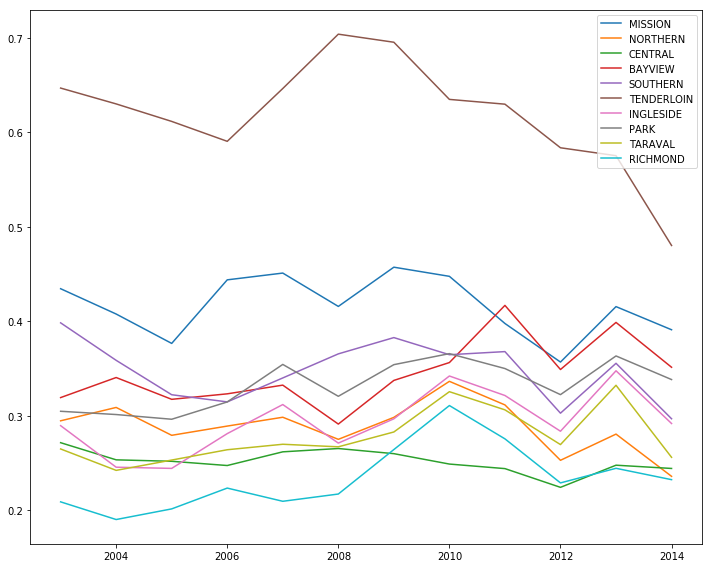

In [11]:
# print all the Resolution states
print(snf['Resolution'].unique())

# calculate percentage of resolved crimes (considering all NONE resolved crimes as not resolved)
Pdresol = snf[snf.Resolution != 'NONE'].groupby(['PdDistrict','Year']).size().unstack()
Pdtot = snf.groupby(['PdDistrict','Year']).size().unstack()
Pdresol = Pdresol/Pdtot

# plot resolution through years for each district
f = plt.figure(figsize=(10,8))
for k in pdu:
    plt.plot(Pdresol.loc[k])
plt.legend()
f.tight_layout()
plt.show()

The resolution percentage lies between 20% and 50% for all neighborhoods except for TENDERLOIN that has a percentage of resolution around 60% (considerably higher). **We can wonder if this difference is due to the effectiveness of the TENDERLOIN police or if it is due to a data consistency problem**

### Data consistency checking
We have noticed two data consistency problems in the visualisations that we would like to address :
* resolution of crimes in TENDERLOIN
* drop of crimes in VEHICLE THEFT from 2006

* resolution of crimes in TENDERLOIN

We have noticed that TENDERLOIN had much higher resolution percentage than other districts. We have also seen on the heatable that TENDERLOIN faced a problem with DRUG/NARCOTIC crimes. As these crimes are considered very rough for neighborhoods, we wonder if the police has worked with particular effort to resolve DRUG/NARCOTIC crimes which would also explain the decrease of these crimes from 2009.

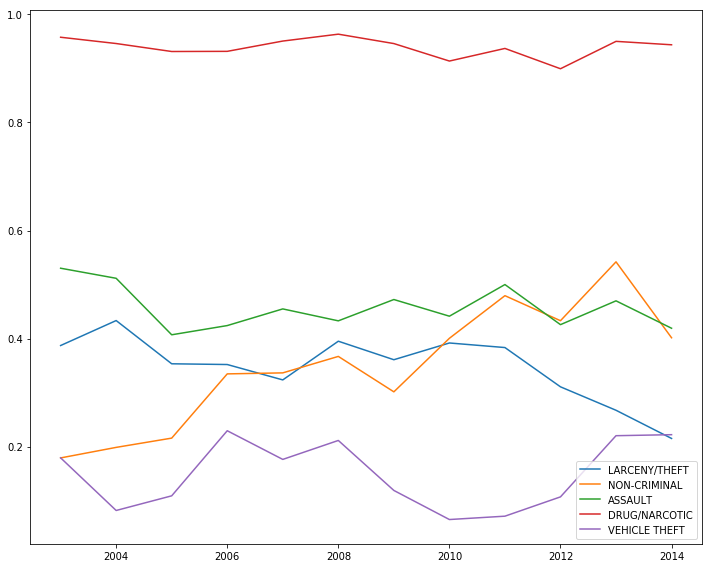

In [12]:
# calculate percentage of resolution for TENDERLOIN for top five crimes
Tendresol = snf[(snf.Resolution != 'NONE') & (snf.PdDistrict == 'TENDERLOIN')].groupby(['Category','Year']).size().unstack()
Tendtot = snf[(snf.PdDistrict == 'TENDERLOIN')].groupby(['Category','Year']).size().unstack()
Tendprop = Tendresol/Tendtot

# plot
f = plt.figure(figsize=(10,8))
for k in t:
    plt.plot(Tendprop.loc[k])
plt.legend()
f.tight_layout()
plt.show()

We notice that 'DRUG/NARCOTIC' crimes have a very high resolution rate close to 100%. We have seen in the heatable that Tenderloin has a problem with drug crimes, with more than 25% of the crimes in Tenderloin being drug crimes. We could assume that given this problem, the police department has deployed extra efforts to get rid of this problem. This remark could be verified by the fact that we notice a decrease in the number of drug crimes in Tenderloin from 2003 to 2014 as we can see on the plot below. 

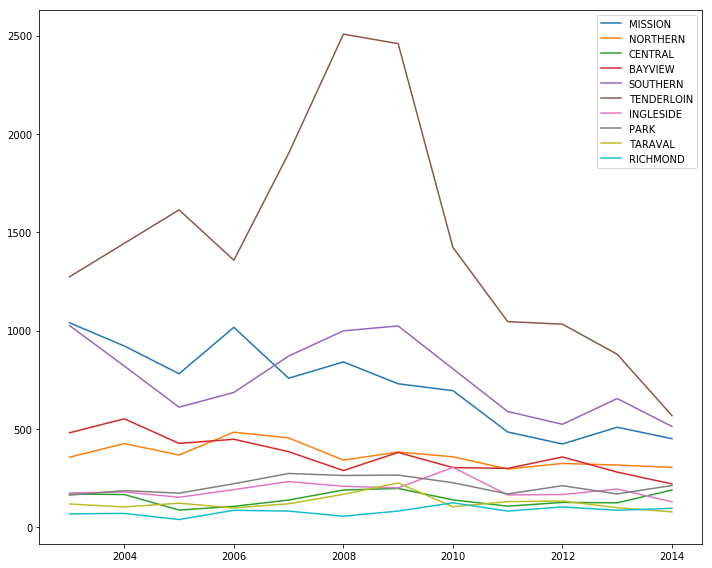

In [13]:
drug = snf_top.loc['DRUG/NARCOTIC'].groupby(['PdDistrict','Year']).size().unstack()

f = plt.figure(figsize=(10,8))
for k in pdu:
    plt.plot(drug.loc[k])
plt.legend()
f.tight_layout()
plt.show()

We take a look at the resolution of crimes per district excluding DRUG/NARCOTIC crimes to see if the percentage of resolved crimes in TENDERLOIN decreases to match the one from other districts.

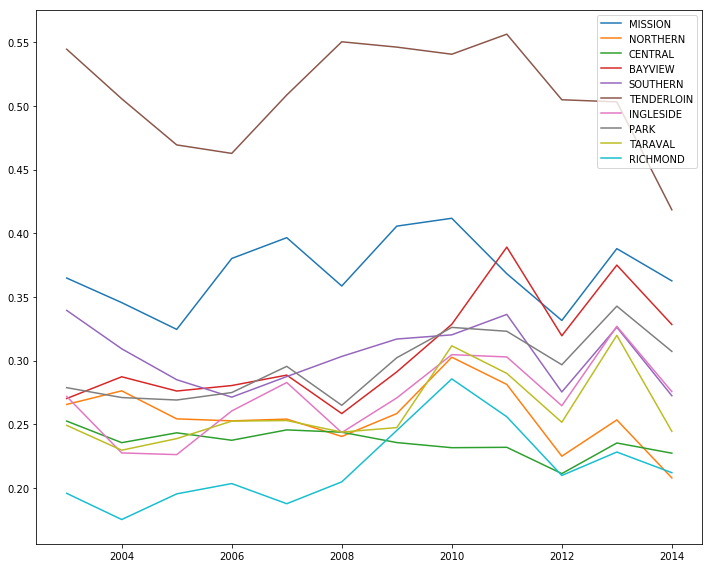

In [14]:
# calculate percentage of resolved crimes
PdNDresol = snf[(snf.Resolution != 'NONE')&(snf.Category != 'DRUG/NARCOTIC')].groupby(['PdDistrict','Year']).size().unstack()
PdNDtot = snf[snf.Category != 'DRUG/NARCOTIC'].groupby(['PdDistrict','Year']).size().unstack()
PdNDresol = PdNDresol/PdNDtot

# plot
f = plt.figure(figsize=(10,8))
for k in pdu:
    plt.plot(PdNDresol.loc[k])
plt.legend()
f.tight_layout()
plt.show()

The percentage of resolved crimes for TENDERLOIN has gone from 60% to 50% by deleting the DRUG/NARCOTIC crimes. This deletion has not affected very much the resolution percentage for other districts. The difference in resolution percentage of TENDERLOIN is less significant now. We can thus assign this disparity to the importance of DRUG/NARCOTIC crimes in TENDERLOIN.

* drop of VEHICLE THEFT crimes from 2006

How can we explain such a drop in the number of crimes of VEHICLE THEFT in 2006 ?
Let's plot again the number of VEHICLE THEFT crimes per day against the years.

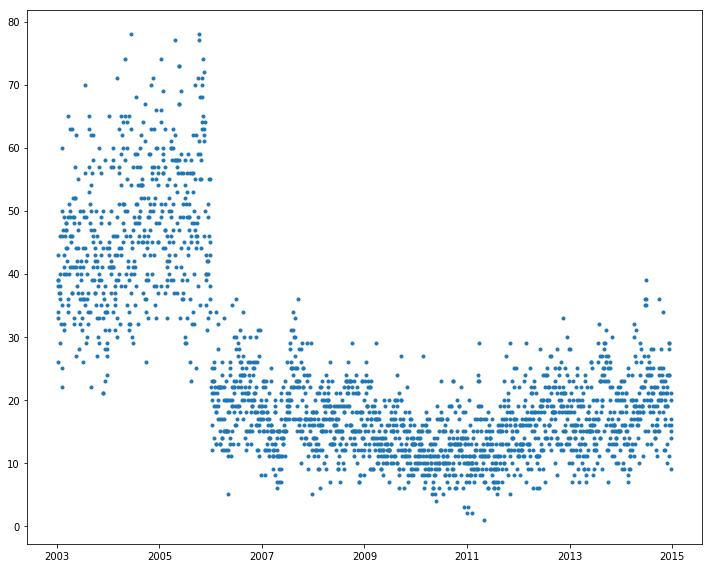

In [15]:
# VEHICLE THEFT data grouped by date
vht = snf_top.loc['VEHICLE THEFT']
vhtday = vht.groupby('Date_without_time').size()

# plot of number of crimes per day 
f = plt.figure(figsize=(10,8))
plt.plot(vhtday,'.')
f.tight_layout()
plt.show()

Before 2006, the number of VEHICLE THEFT crimes per day was on average 50 whereas it is only 10-20 after 2006. Let's take a look at the description of VEHICLE THEFT crimes to see if it could explain this decrease.

In [16]:
snf_top.loc['VEHICLE THEFT'].Descript.unique()

array(['STOLEN AUTOMOBILE', 'STOLEN TRUCK', 'STOLEN MOTORCYCLE',
       'AUTO, GRAND THEFT OF', 'STOLEN AND RECOVERED VEHICLE',
       'ATTEMPTED STOLEN VEHICLE', 'STOLEN MISCELLANEOUS VEHICLE',
       'STOLEN BUS', 'VEHICLE, RENTAL, FAILURE TO RETURN',
       'STOLEN TRAILER', 'RECOVERED VEHICLE - STOLEN OUTSIDE SF',
       'VEHICLE, RECOVERED, AUTO', 'VEHICLE, RECOVERED, OTHER VEHICLE',
       'VEHICLE, RECOVERED, MOTORCYCLE',
       'VEHICLE, RECOVERED, CAMPER-HOUSE CAR-MOTOR HOME',
       'TAMPERING WITH A VEHICLE',
       'VEHICLE, RECOVERED, MOBILE HOME-TRAILER', 'VEHICLE, RECOVERED, BUS'], dtype=object)

We notice a few descriptions of recovered vehicles. Can we consider losing and recovering your vehicle as a crime ? We group all the crimes that involve recovering vehicles and we observe the number of these crimes per day through the years.

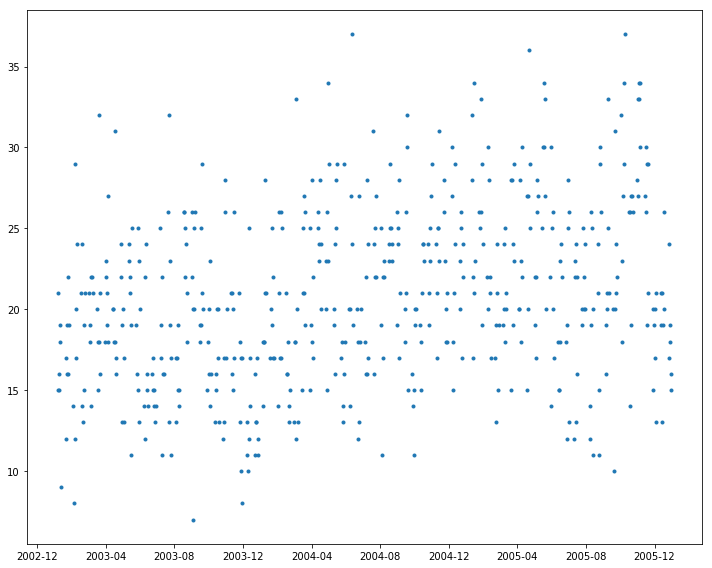

In [17]:
# extract data for RECOVERED VEHICLE THEFT
vhtnoncri = vht[vht.Descript.isin(['VEHICLE, RECOVERED, AUTO', 'VEHICLE, RECOVERED, OTHER VEHICLE','VEHICLE, RECOVERED, MOTORCYCLE',
 'VEHICLE, RECOVERED, CAMPER-HOUSE CAR-MOTOR HOME','TAMPERING WITH A VEHICLE',
       'VEHICLE, RECOVERED, MOBILE HOME-TRAILER', 'VEHICLE, RECOVERED, BUS'])]
vhtnoncri = vhtnoncri.groupby('Date_without_time').size()

# plot number of crimes per day
f = plt.figure(figsize=(10,8))
plt.plot(vhtnoncri,'.')
f.tight_layout()
plt.show()

We observe there are **NO RECOVERED VEHICLE THEFT crimes after 2006 !!** We can imagine that the police department has decided to reclassify recovered vehicles as something else than crimes. We plot the number of VEHICLE THEFT crimes per day excluding the crimes above. 

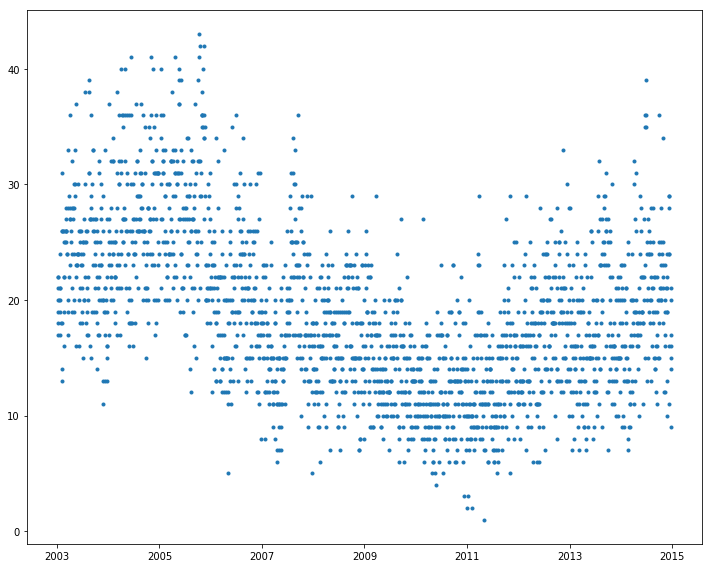

In [18]:
# vehicle theft crimes excluding recovered vehicles
vhtcri = vht[vht.Descript.isin(['STOLEN AUTOMOBILE', 'STOLEN TRUCK', 'STOLEN MOTORCYCLE','AUTO, GRAND THEFT OF', 
        'STOLEN AND RECOVERED VEHICLE','ATTEMPTED STOLEN VEHICLE', 'STOLEN MISCELLANEOUS VEHICLE','STOLEN BUS', 
        'VEHICLE, RENTAL, FAILURE TO RETURN','STOLEN TRAILER', 'RECOVERED VEHICLE - STOLEN OUTSIDE SF'])]
vhtday = vhtcri.groupby('Date_without_time').size()

# plot
f = plt.figure(figsize=(10,8))
plt.plot(vhtday,'.')
f.tight_layout()
plt.show()

This plot is more normal as we don't observe a big unexplained drop in the number of crimes. We have decided to delete the recovered vehicle crimes and observe that this deletion reduces the importance of VEHICLE THEFT crimes as they are no more in the top five crimes.

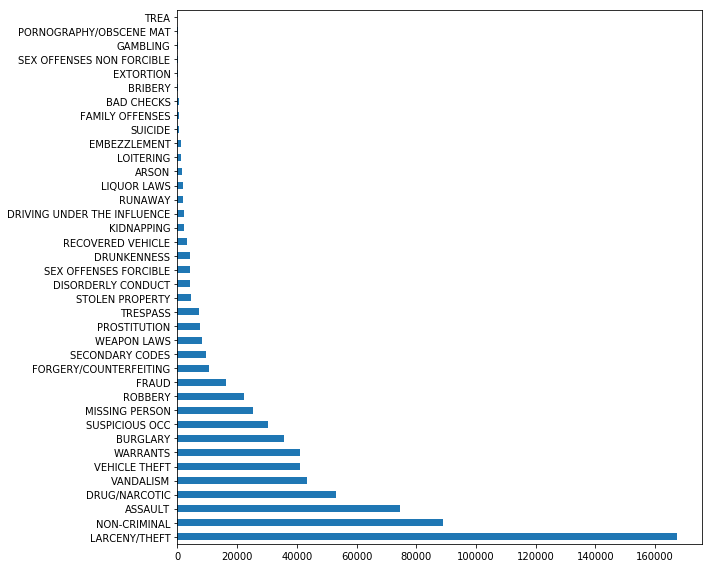

In [19]:
# delete recovered vehicle crimes from initial dataset
snf2 = snf.copy()
snf2[snf2.Category == 'VEHICLE THEFT'] = snf2[(snf2.Category == 'VEHICLE THEFT')&(snf2.Descript.isin(['STOLEN AUTOMOBILE', 
        'STOLEN TRUCK','STOLEN MOTORCYCLE','AUTO, GRAND THEFT OF','STOLEN AND RECOVERED VEHICLE',
        'ATTEMPTED STOLEN VEHICLE', 'STOLEN MISCELLANEOUS VEHICLE','STOLEN BUS', 'VEHICLE, RENTAL, FAILURE TO RETURN',
            'STOLEN TRAILER', 'RECOVERED VEHICLE - STOLEN OUTSIDE SF']))]

# plot number of crimes per category
cat = snf2.Category.value_counts()
f = plt.figure(figsize=(10,8))
cat.plot(kind = 'barh')
f.tight_layout()
plt.show()

## Estimation question

* In this section, we will build models for two different types of prediction
* First we will build a model to predict the category of crime based on the other predictors
* Then we will try to model the number of crimes happening in a given day

### Predicting crime category

We want to predict the crime *Category* based on other predictors. We will not allow ourselves to use the *Description* predictor as for each crime category there is a corresponding subset of crime descriptions.

Let's look at the different crime categories

In [20]:
print('Number of categories: ' + str(len(snf.groupby(['Category']))))
snf.groupby(['Category']).count().iloc[:,0]

Number of categories: 38


Category
ARSON                            1444
ASSAULT                         74551
BAD CHECKS                        402
BRIBERY                           274
BURGLARY                        35665
DISORDERLY CONDUCT               4249
DRIVING UNDER THE INFLUENCE      2208
DRUG/NARCOTIC                   53220
DRUNKENNESS                      4171
EMBEZZLEMENT                     1147
EXTORTION                         252
FAMILY OFFENSES                   480
FORGERY/COUNTERFEITING          10482
FRAUD                           16130
GAMBLING                          140
KIDNAPPING                       2268
LARCENY/THEFT                  167389
LIQUOR LAWS                      1868
LOITERING                        1220
MISSING PERSON                  25190
NON-CRIMINAL                    88895
PORNOGRAPHY/OBSCENE MAT            22
PROSTITUTION                     7438
RECOVERED VEHICLE                3138
ROBBERY                         22278
RUNAWAY                          1920
SEC

So we have 38 categories to estimate. For this we will use multinomial logistic regression. This is an extension of logistic regression to the case where we have more than two classes in the response variable. The way it works is that it fits $n-1$ logistic regressions, each time evaluating one category vs all the rest. To estimate the category of a new data point, choose the category corresponding to the model which outputs the highest probability of positive response.

Let's look at which predictors we might use.

In [21]:
snf[:5]

,Category,index,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Date_without_time
0,LARCENY/THEFT,27584,2014-12-28 23:30:00,GRAND THEFT PICKPOCKET,Sunday,MISSION,NONE,4100 Block of 18TH ST,-122.435563,37.760801,2014,12,28,23,2014-12-28
1,LARCENY/THEFT,27585,2014-12-28 23:30:00,GRAND THEFT FROM LOCKED AUTO,Sunday,NORTHERN,NONE,1900 Block of LOMBARD ST,-122.433575,37.800037,2014,12,28,23,2014-12-28
2,VEHICLE THEFT,27586,2014-12-28 23:30:00,STOLEN AUTOMOBILE,Sunday,CENTRAL,NONE,500 Block of GEARY ST,-122.412777,37.786834,2014,12,28,23,2014-12-28
3,ASSAULT,27587,2014-12-28 23:30:00,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Sunday,NORTHERN,"ARREST, BOOKED",0 Block of ROSE ST,-122.421702,37.773641,2014,12,28,23,2014-12-28
4,ASSAULT,27588,2014-12-28 23:30:00,INFLICT INJURY ON COHABITEE,Sunday,NORTHERN,"ARREST, BOOKED",0 Block of ROSE ST,-122.421702,37.773641,2014,12,28,23,2014-12-28


As a first approach we choose to use the variables *DayOfWeek*, *PdDistrict* and *Resolution* as predictors in our model. Note that since these are all categorical variables, we will need to transform them to dummy variables. For each level in each category, we create a new variable which is 1 if that the data point takes on that category, and 0 otherwise.

Luckily for this we can use the useful **get_dummies()** function in **pandas**

In [22]:
#Create our predictor dataframe containing only the columns we want
X = snf.loc[:, ['DayOfWeek', 'PdDistrict', 'Resolution']]
#Create dummy variables
X = pd.get_dummies(X, drop_first=True)
#Create the response data frame
Y = snf.loc[:, 'Category']

print("Number of data points: " + str(len(X)))
print("Total number of dummy variables: " + str(len(X.columns)) + '\n')
print(X.head())

Number of data points: 727909
Total number of dummy variables: 31

   DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  \
0                 0                   0                 1                   0   
1                 0                   0                 1                   0   
2                 0                   0                 1                   0   
3                 0                   0                 1                   0   
4                 0                   0                 1                   0   

   DayOfWeek_Tuesday  DayOfWeek_Wednesday  PdDistrict_CENTRAL  \
0                  0                    0                   0   
1                  0                    0                   0   
2                  0                    0                   1   
3                  0                    0                   0   
4                  0                    0                   0   

   PdDistrict_INGLESIDE  PdDistrict_MISSION  PdDistrict

So we have 31 predictors in our model. This may seem like a lot to estimate, but we have a lot of data: 727909 data points in total.
We should however check whether each individual category has enough data.

In [23]:
Y.groupby(Y).count()

Category
ARSON                            1444
ASSAULT                         74551
BAD CHECKS                        402
BRIBERY                           274
BURGLARY                        35665
DISORDERLY CONDUCT               4249
DRIVING UNDER THE INFLUENCE      2208
DRUG/NARCOTIC                   53220
DRUNKENNESS                      4171
EMBEZZLEMENT                     1147
EXTORTION                         252
FAMILY OFFENSES                   480
FORGERY/COUNTERFEITING          10482
FRAUD                           16130
GAMBLING                          140
KIDNAPPING                       2268
LARCENY/THEFT                  167389
LIQUOR LAWS                      1868
LOITERING                        1220
MISSING PERSON                  25190
NON-CRIMINAL                    88895
PORNOGRAPHY/OBSCENE MAT            22
PROSTITUTION                     7438
RECOVERED VEHICLE                3138
ROBBERY                         22278
RUNAWAY                          1920
SEC

We see that overall, categories are well represented, except for a few categories which for which we probably don't have enough data to correctly estimate (*PORNOGRAPHY/OBSCENE MAT* for example).

Because we will want to estimate the quality of our model, we separate the data into training and test set.

In [24]:
#For this we use the train_test_split function in scikyt-learn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
X_train.shape, Y_train.shape

((436745, 31), (436745,))

Now let's fit a logistic regression model to our training data. We use scikytlearn.  
**This code takes around 1min 30s to execute**

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model_1 = logreg.fit(X_train, Y_train)

To evaluate the quality of the fit, we can calculate the model accuracy on the test data. This computes the percentage of data points that are well classified by our category. (i.e. the percentage of data for which the estimated category is the same as the true category.

In [26]:
model_1.score(X_test, Y_test)

0.3326372765863912

33% is quite a good model accuracy when we consider that we have 38 categories to estimate. Let's see if we can improve the quality of our fit by adding other predictors.

**Could we improve our model by adding features ?**

We remember from the first part that the number of crimes commited was very dependent on the hour of the day. Let's try to add a predictor for hour of day. However there is an issue: should we treat time as a quantitative or qualitative variable ? Hour of day is what we call a *cyclical variable*: 0 is the same value as 24. For this reason, we cannot use a traditional quantitative variable.  
There are two approaches to this problem:
* We can use hourly data to construct two new quantitative variables: $C = cos(2\pi*\frac{hour}{24})$ and $S = sin(2\pi*\frac{hour}{24})$. These trigonometric functions allow us to handle the cyclic nature of hourly data.
* We can treat hour as a categorical variable with 24 levels (but then we lose the natural ordering of time)

Let's start with the first method, as it only adds 2 predictors to our model.  
**Treating time as a cylcical quantitative variable**

In [27]:
#Copy the X dataframe
X_quant_h = pd.DataFrame(X)
#Create the two new variables
X_quant_h['hour_cos'] = np.cos(2*np.pi * snf.Dates.dt.hour/24)
X_quant_h['hour_sin'] = np.sin(2*np.pi * snf.Dates.dt.hour/24)

X_quant_h.head()

,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,...,Resolution_JUVENILE DIVERTED,Resolution_LOCATED,Resolution_NONE,Resolution_NOT PROSECUTED,Resolution_PROSECUTED BY OUTSIDE AGENCY,Resolution_PROSECUTED FOR LESSER OFFENSE,Resolution_PSYCHOPATHIC CASE,Resolution_UNFOUNDED,hour_cos,hour_sin
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0.965926,-0.258819
1,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0.965926,-0.258819
2,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0.965926,-0.258819
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.965926,-0.258819
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.965926,-0.258819


In [28]:
#Separate into train and test sets
X_quant_h_train, X_quant_h_test, Y_train, Y_test = train_test_split(X_quant_h, Y, test_size=0.4, random_state=0)

In [29]:
#Fit a logistic regression on the train set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model_quant_h = logreg.fit(X_quant_h_train, Y_train)

In [30]:
#Compute model accuracy
model_quant_h.score(X_quant_h_test, Y_test)

0.33514102018106634

Unfortunately we see that we barely improved our fit with these two extra predictors (we went from .3326 accuracy to .3337 on the cross-validation test data)

**Now let's treat hours as a categorical predictor**
We first need to construct our classifier

In [31]:
#Create a new dataframe by copying X
X_cat_h = pd.DataFrame(X)
#Add a column for hours
X_cat_h['hour'] = snf.Dates.dt.hour
#Create dummies for that column
X_cat_h = pd.get_dummies(X_cat_h, columns=['hour'], drop_first=True)

X_cat_h.head()

,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [32]:
#Create train and test set
X_cat_h_train, X_cat_h_test, Y_train, Y_test = train_test_split(X_cat_h, Y, test_size=0.4, random_state=0)

In [33]:
#Fit a logistic regression model.
logreg = LogisticRegression()
model_cat_h = logreg.fit(X_cat_h_train, Y_train)

In [34]:
#Compute model accuracy
model_cat_h.score(X_cat_h_test, Y_test)

0.33641521616683379

This time we added 23 new predictors to our model, but once again we barely increased model accuracy (from .3326 accuracy to .3364 on the cross-validation test data).  
This is quite disappointing. Overall we would prefer the first model without predictors associated to time, as that model is simpler and gives about the same quality of fit.

### Predicting number of crimes in a given day

We will now build a model to predict the number of crimes happening over a day.
Let's look at the distribution of crimes over an average day.

First we create use the *Dates* column in our **snf** dataframe to create new columns containing information on *Year*, *Month*, *Day* and *Hour*. 

In [35]:
snf.head()

,Category,index,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Date_without_time
0,LARCENY/THEFT,27584,2014-12-28 23:30:00,GRAND THEFT PICKPOCKET,Sunday,MISSION,NONE,4100 Block of 18TH ST,-122.435563,37.760801,2014,12,28,23,2014-12-28
1,LARCENY/THEFT,27585,2014-12-28 23:30:00,GRAND THEFT FROM LOCKED AUTO,Sunday,NORTHERN,NONE,1900 Block of LOMBARD ST,-122.433575,37.800037,2014,12,28,23,2014-12-28
2,VEHICLE THEFT,27586,2014-12-28 23:30:00,STOLEN AUTOMOBILE,Sunday,CENTRAL,NONE,500 Block of GEARY ST,-122.412777,37.786834,2014,12,28,23,2014-12-28
3,ASSAULT,27587,2014-12-28 23:30:00,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Sunday,NORTHERN,"ARREST, BOOKED",0 Block of ROSE ST,-122.421702,37.773641,2014,12,28,23,2014-12-28
4,ASSAULT,27588,2014-12-28 23:30:00,INFLICT INJURY ON COHABITEE,Sunday,NORTHERN,"ARREST, BOOKED",0 Block of ROSE ST,-122.421702,37.773641,2014,12,28,23,2014-12-28


Let's plot the the distribution of crimes over an average day

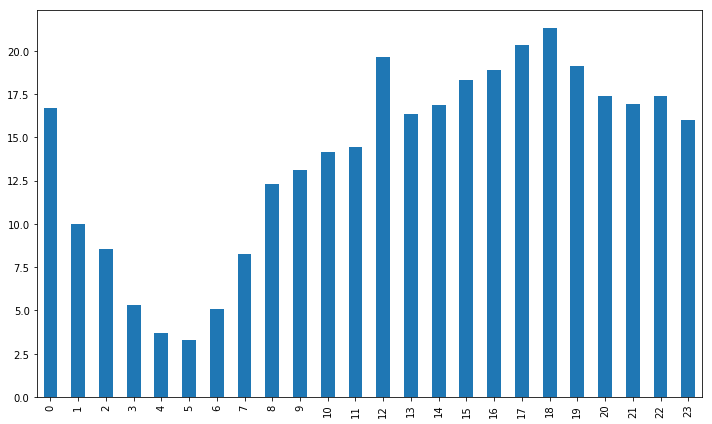

In [36]:
#Create h which contains total number of crimes commited at a particular hour, over the whole period
h = snf.Hour.value_counts().sort_index()
#Now divide by the total number of days in the period. We get the average number of crimes commited for each hour of the day
h = h/snf.Date_without_time.nunique()

#Plot h
f = plt.figure(figsize=(10,6))
h.plot(kind = 'bar')
f.tight_layout()
plt.show()


It looks like by reindexing we might get something that looks like a gaussian curve.  
Let's try this. We can do this because Time is cyclical (0H = 24H).

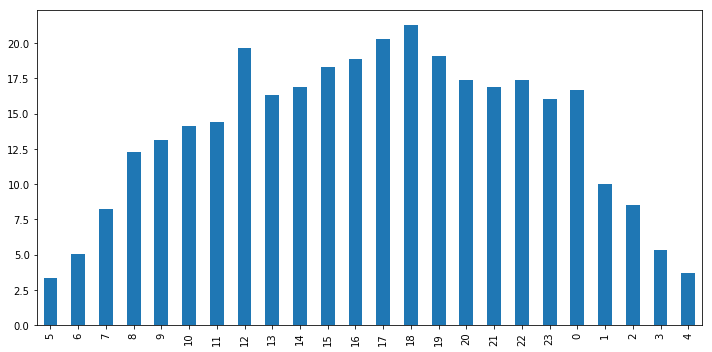

In [37]:
new_index = list(range(5,24)) + list(range(0,5)) 
#reindex h with our new_index
new_h = h.reindex(new_index)

#Plot
f = plt.figure(figsize=(10,5))
new_h.plot(kind = 'bar')
f.tight_layout()
plt.show()

This looks quite close to a **Gaussian curve**.
As a reminder of what a Gaussian curve is, here is a graph of a standard normal distribution.

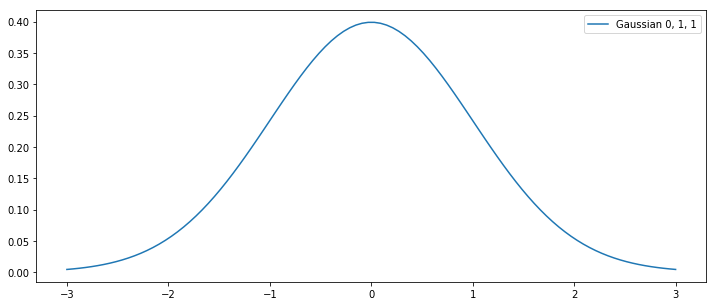

In [38]:
import numpy

#Create a gaussian function
def gauss(param, hour) :
    return (param[2]/ (numpy.sqrt(2*numpy.pi) * param[1]) * 
            numpy.exp(-(hour - param[0])**2 / (2*param[1]**2) ))

x = numpy.linspace(-3, 3, 100)
y = gauss([0, 1, 1], x)

plt.figure(figsize=(12,5))
plt.plot(x, y, label="Gaussian 0, 1, 1")
plt.legend(loc='best')
plt.show()

Now let's try to fit a gaussian curve to this averaged data using a *least squares optimization*.

leastsq exit code : 1
estimated parameters : [  16.79368044    7.27677112  372.14805659]


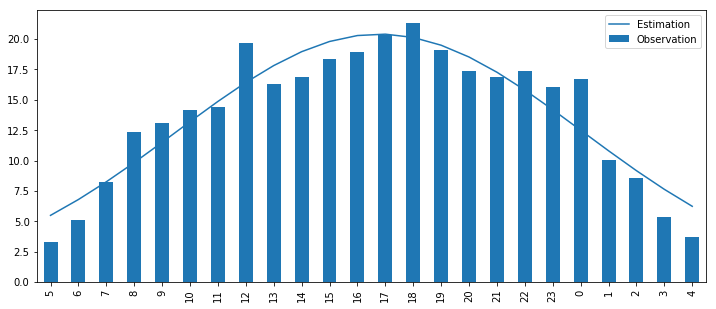

In [39]:
import scipy.optimize

#We define the error function
def err_func(param, x, y) :
    return gauss(param, x) - y

#Initialize the parameters (we choose initialisations that are realistic given our data)
param_init = [15, 5, 400]
#Fit the model
param_fit, fit_code = scipy.optimize.leastsq( err_func, param_init[:] ,
                                             args=(range(5,29), list(new_h)))

print("leastsq exit code :", fit_code)
print("estimated parameters :", param_fit)
#Create gaussian data using the fitted parameters
crimes_est = gauss(param_fit, range(5,29))

#Plot both observed data and estimated gaussian data
plt.figure(figsize=(12,5))
new_h.plot(kind = 'bar', label = 'Observation')
plt.plot(range(0,24), crimes_est, label="Estimation")
plt.xticks(range(0,24),new_index)
plt.legend(loc='best')
plt.show()

This fit looks quite ok. But it is on averaged data over the whole period.
**Can we use the gaussian model to predict the distribution of crimes on a particular given day ?**

Let's try to predict the daily distribution of crimes over the last week of November 2014. Here is how we will proceed. We have seen before that the number of crimes depends on the month and day of the week. We want to predict hourly crime numbers for the whole week of 24/11/2014 to 30/11/2014 . 
To predict the hourly crime distribution of Monday, Nov 11th 2014, fit a Gaussian distribution on average crime numbers over all previous mondays of November 2014. Do the same for the other days of the week. This way we should be able to retain the variation due to the day of the week and month of november.

In [40]:
#this contains the days we want predict crimes for
week_to_predict = range(24, 31)

#Initialize a list that will later contain 7 dataframes
#each one corresponding to past November 2014 data for a given day of the week
prev_data=[None]*7
#Initialize a list that will later contain 7 series
#each one containing average crime data for 
prev_h=[None]*7

In [41]:
for i, day in enumerate(week_to_predict):
    #Find which day of the week this date corresponds to
    dayofweek = calendar.day_name[datetime.date(2014,11,day).weekday()]
    #From snf, get the data corresponding to November 2014, on the same day of the week
    #Load this dataframe into our prev_data list
    prev_data[i] = snf.query('Year == 2014 & Month == 11 & DayOfWeek == "{}" & Day != {}'.format(str(dayofweek), day))
    
    #Count the number of crimes at each hour in the data we just extracted above
    prev_h[i] = prev_data[i].Hour.value_counts().sort_index()
    #Divide by the total number of days to get average data
    prev_h[i] = prev_h[i]/prev_data[i].Date_without_time.nunique()
    #reindex
    prev_h[i] = prev_h[i].reindex(new_index)


leastsq exit code for day of Monday 24 /11/2014 :  1
estimated parameters : [  16.48072776    7.80667204  386.56767236]


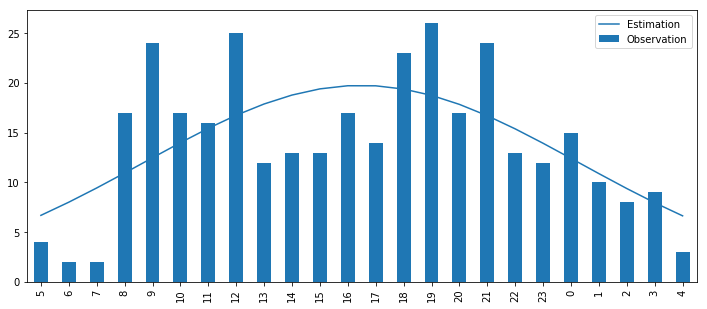

leastsq exit code for day of Tuesday 25 /11/2014 :  4
estimated parameters : [  17.   10.  300.]


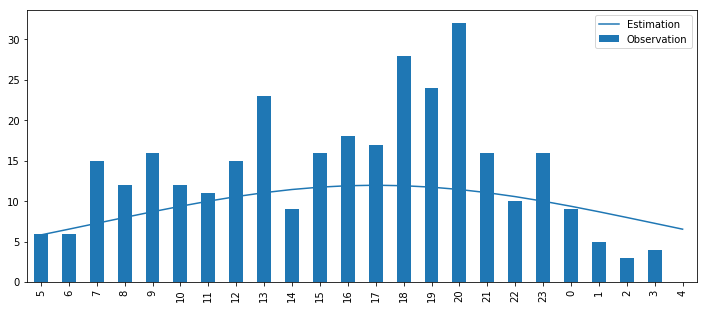

leastsq exit code for day of Wednesday 26 /11/2014 :  1
estimated parameters : [  16.40415421    7.25745141  408.7070033 ]


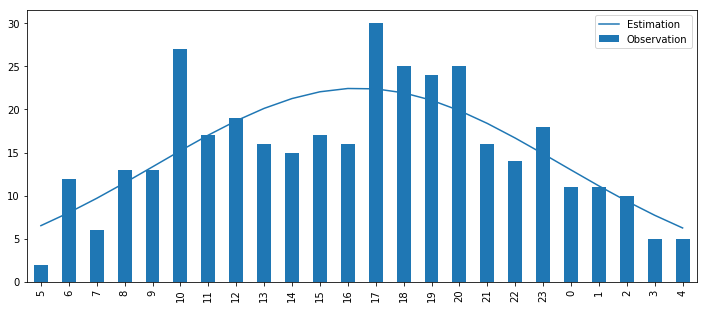

leastsq exit code for day of Thursday 27 /11/2014 :  4
estimated parameters : [  17.   10.  300.]


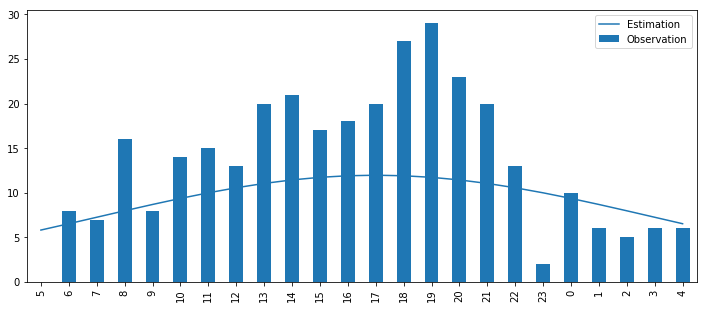

leastsq exit code for day of Friday 28 /11/2014 :  1
estimated parameters : [  18.08855921    6.75074317  450.16180477]


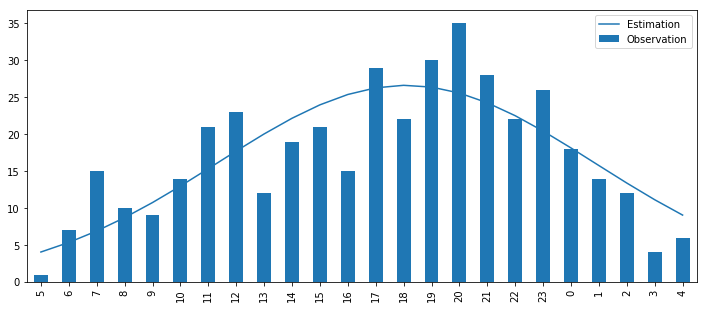

leastsq exit code for day of Saturday 29 /11/2014 :  1
estimated parameters : [  19.68426527    8.41114969  506.25819486]


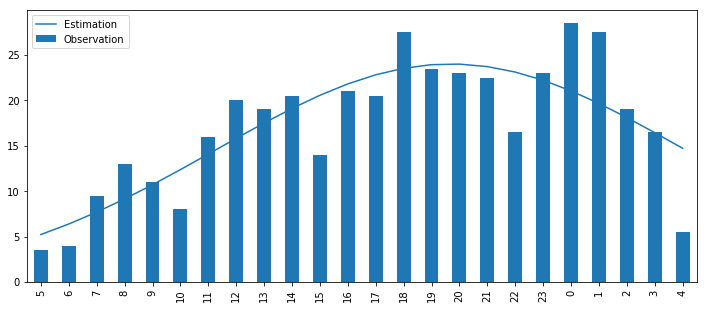

leastsq exit code for day of Sunday 30 /11/2014 :  1
estimated parameters : [  18.37687851    7.69099354  371.89748912]


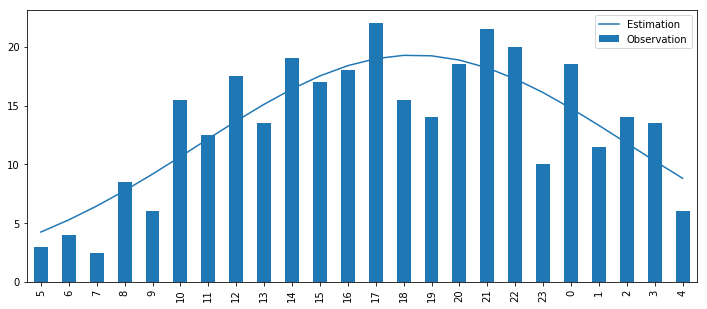

In [42]:
#Initialize the parameters (we choose 'nice' initialisations)
param_init = [17, 10, 300]

#For each day we want to estimate
for i in range(7):
    #Fit gaussian model using the data we extracted above for that dayoftheweek
    param_fit, fit_code = scipy.optimize.leastsq(err_func, param_init[:] ,
                                                 args=(range(5,29), list(prev_h[i])))
    print("leastsq exit code for day of", str(calendar.day_name[datetime.date(2014,11,week_to_predict[i]).weekday()]),  
            week_to_predict[i], "/11/2014 : ", fit_code)
    print("estimated parameters :", param_fit)
    
    #Estimate using the parameters we have fit
    crimes_est = gauss(param_fit, range(5,29))
    
    #Plot both our estimations, and the data actually observed that day
    plt.figure(figsize=(12,5))
    prev_h[i].plot(kind = 'bar', label = 'Observation')
    plt.plot(range(0,24), crimes_est, label="Estimation")
    plt.xticks(range(0,24),new_index)
    plt.legend(loc='best')
    plt.show()

We notice that our model did not work for Tuesday and Thursday data: the leastquares function did not converge.

Visually, it seems that this approach worked quite well. We were able to give rather close predictions of crime numbers using past data. Taking into account the day of the week was useful: for saturday the peak of our bell curve is later than for other days, and this is indeed what we observe on the last saturday of November.

**We think the San Francisco police department could use a similar model to decide on the number of officers it should have on duty throughout the day**.

To investigate why the model did not converge for tuesday and thursday, let's plot the data that was used to fit the model

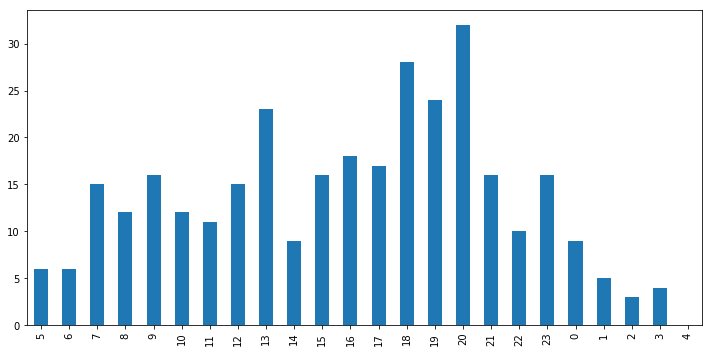

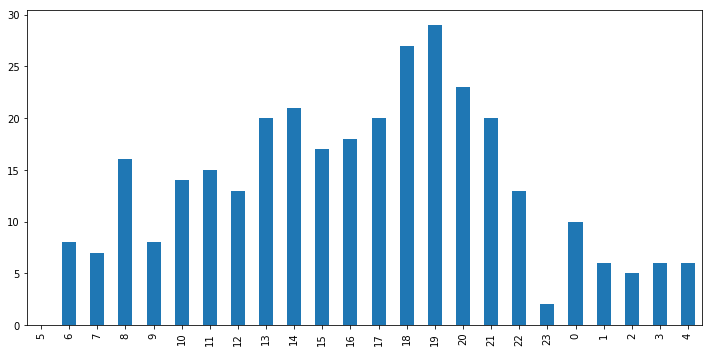

In [43]:
f = plt.figure(figsize=(10,5))
prev_h[1].plot(kind = 'bar')
f.tight_layout()
plt.show()

f = plt.figure(figsize=(10,5))
prev_h[3].plot(kind = 'bar')
f.tight_layout()
plt.show()

What we see is that in our Tuesday data, there are 0 crimes at 4am. This means that 0 crimes happened at 4am over all previous Tuesdays of November 2014. We observe the same thing for the Thursday data at 5 am.
Our interpretation is that our model did not converge because of these zeros. Indeed, gaussian function never reaches zero.